# DATASET ANALYSE

Analyse du dataset pour un entrainement supervisé
L'objectif est de connaître la répartission des données des __angles__ et ___throttle__. 

In [1]:
import json
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
import numpy as np

file_path = ['dataset_drive14']

In [2]:
def load_images_with_labels(path):

    def verif(data):
        if abs(data)<=5:
            return True
        else:
            return False

    images = []
    throttle= []
    angle = []
    centre_piste=[]
    for file_path in path:
        with open(file_path+'/labels.json', 'r') as file:
            data = json.load(file)
            
        for img_filename, values in data.items():
            # Load image using PIL
            img_path = file_path+"/images/"+img_filename  # Modify the path to your image directory
            image = Image.open(img_path)
            images.append(image)


            # Extract throttle and angle values
            throttle.append(values["user/throttle"])
            angle.append(values["user/angle"])
            centre_piste.append(values["pos/cte"])

        return images, throttle, angle, centre_piste

# Load images and corresponding labels

images, throttle_values, angle_values, centre_piste = load_images_with_labels(file_path)
print(len(images))

3770


In [3]:
def get_distribution(data, dx):
    distribution = Counter()
    for value in data:
        bin_index = int(value / dx)
        distribution[bin_index] += 1
    return distribution

0.8384325984719291
4.2072084348629195


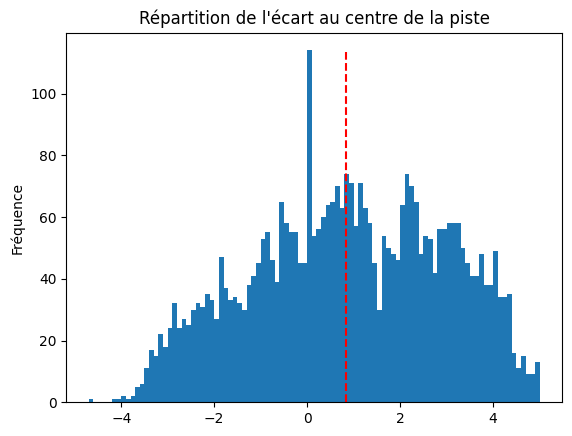

In [4]:
bin_width = 0.1

result = get_distribution(centre_piste, bin_width)

bin_starts = [bin_index * bin_width for bin_index in sorted(result.keys())]
counts = [result[bin_index] for bin_index in sorted(result.keys())]

moyenne = np.mean(centre_piste)
print(moyenne)
ecart_type = np.std(centre_piste)
print(ecart_type*2)

plt.bar(bin_starts, counts, width=bin_width, align='edge')
plt.plot([moyenne, moyenne], [0, max(counts)], color='red', linestyle='dashed')

plt.xlabel('')
plt.ylabel('Fréquence')
plt.title('Répartition de l\'écart au centre de la piste')
plt.show()

In [63]:
#load json file
with open(file_path[0]+"/labels.json", "r") as file:
    json_data = json.load(file)

# Filter elements where pos/cte is under 5
filtered_data = {k: v for k, v in json_data.items() if abs(v["pos/cte"]) <=4 }

import os
for img_filename in os.listdir(file_path[0]+"/images"):
    if img_filename not in filtered_data:
        os.remove(file_path[0]+"/images/"+img_filename)

# Convert filtered data back to JSON
filtered_json = json.dumps(filtered_data, indent=4)

# Write JSON to file
with open(file_path[0]+"/labels.json", "w") as file:
    file.write(filtered_json)

In [23]:
# Read the JSON data from the file
with open(file_path+'/labels.json', 'r') as file:
    data = json.load(file)

# Filter out elements with angle below 0.8
filtered_data = {key: value for key, value in data.items() if (value['user/throttle'] >-0.8)}

# Write the updated JSON back to the file
#with open(file_path+'/labels.json', 'w') as file:
#    json.dump(filtered_data, file, indent=4)